#ANÁLISIS DE SENTIMIENTOS

ANDREA BENÍTEZ PINEDA

##Acerca del conjunto de datos

Este conjunto de datos contiene un archivo CSV relacionado con ChatGPT que incluye palabras clave (chatgpt, chat gpt) #hashtags y @mentions sobre ChatGPT. Modelo de IA conversacional de OpenAI. El archivo incluye información sobre 500.000 tweets. El conjunto de datos tiene como objetivo ayudar a comprender la opinión pública, las tendencias y las posibles aplicaciones de ChatGPT mediante el análisis del volumen de tweets, el sentimiento, la participación del usuario y la influencia de los eventos clave de IA. El conjunto de datos ofrece información valiosa para empresas, investigadores y responsables políticos, lo que les permite tomar decisiones informadas y dar forma al futuro de las tecnologías conversacionales impulsadas por IA.

Este conjunto de datos contiene las siguientes columnas:

* **Fecha** - Fecha del tweet.
* **id** - Un identificador único para cada tweet.
* **content** - Contenido del tweet.
* **nombre de ususario** - Nombre de usuario de la persona que tuiteó.
* **like_count** - El número de likes recibidos por el tweet.
* **retweet_count**- El número de veces que el tweet fue retuiteado.


Link:

https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023


##1. Conjunto de datos

In [ ]:
import numpy as np
from zipfile import ZipFile
import pandas as pd


archivo = "/content/Twitter Jan Mar.csv.zip"

print('Extrayendo contenido...')
with ZipFile(archivo, 'r') as Zip:
    Zip.extractall()
    print('Extracción finalizada.')

df = pd.read_csv("Twitter Jan Mar.csv")

Extrayendo contenido...
Extracción finalizada.


In [ ]:
df

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0
...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1.0,0.0
500032,2023-01-04 07:17:50+00:00,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,TryingToOffend,2.0,0.0
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,mcp350,3.0,1.0
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0


##Limpieza de datos

In [ ]:
#Veamos si hay datos duplicados
duplicated = df.duplicated().sum()
print(f' {duplicated} filas duplicadas.')


 0 filas duplicadas.


In [ ]:
#Veamos si hay valores faltantes.
df.isnull().sum()

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64

In [ ]:
#Eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

df= df.dropna()

###Clasificación de los datos
Extraemos los tweets que contienen iconos que representan sentimientos para clasificar.

In [ ]:
#28
positivos_icons = '😁|😂|😃|😄|😅|😆|😉|😊|😍|🤩|❤️|👍|😇|🤓|🥰|🤠|🫰|💕|🎉|🎊|😌|🤩|🥳|😺|😸|😻|🌈'

positivos= pd.Series(df['content'], dtype="string", name="positivos").str.contains(positivos_icons)
positivos.sum()

21072

In [ ]:
#31
negativos_icons = '😓|😖|😢|😭|😰|😱|🙍|🙎|😞|🥺|😧|💧|🫤|🫥|😾|👎|🤨|🤢|🤮|👿|👺|😧|😞|💩|😡|🤬|🤯|👎|💔|💀|☠️'

negativos = pd.Series(df['content'], dtype="string", name="negativos").str.contains(negativos_icons)
negativos.sum()

7271

In [ ]:
#unimos resultados
df1=pd.concat([df['id'],df['content'], positivos,negativos], axis=1)
df1

,id,content,positivos,negativos
0,1641213230730051584,"Free AI marketing and automation tools, strate...",False,False
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,True,False
2,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,False,False
3,1641213110915571715,"AI muses: ""In the court of life, we must all f...",False,False
4,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,False,False
...,...,...,...,...
500031,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,False,False
500032,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,False,False
500033,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,True,False
500034,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,True,False


In [ ]:
#Clasificamos los textos que contienen las categorias
texts_classified = df1[(df1['positivos'] | df1['negativos'] )]

texts_no_classified = df1[~(df1['positivos'] )]['content']

In [ ]:
#limpiamos los que tienen ambas categorias
count = texts_classified.apply(lambda row: row['positivos'] + row['negativos'] , axis=1)
count = count.rename("count")

In [ ]:
texts_classified = pd.concat([texts_classified, count], axis=1)

In [ ]:
texts_classified = texts_classified[texts_classified['count'] == 1]
texts_classified

,id,content,positivos,negativos,count
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,True,False,1
8,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,True,False,1
43,1641210743369396225,@nertilqatja @michael_dehart @greg16676935420 ...,False,True,1
48,1641210371037097984,I asked Chat GPT about defensive football. \n\...,False,True,1
84,1641208764161306627,not me demanding chat gpt to write corny fanfi...,False,True,1
...,...,...,...,...,...
499975,1610542918309220353,@DataChaz Did you ask #chatGPT for an explanat...,True,False,1
499978,1610542537592246272,Do you want to use #chatGPT like a Pro? \nFoll...,True,False,1
500024,1610537189590564864,Just managed to convince BiL to check out #cha...,True,False,1
500033,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,True,False,1


In [ ]:
#Agregamos la columna target
def label_feeling (row):
   if row['positivos'] :
      return 0
   if row['negativos'] :
      return 1


texts_classified['target'] = texts_classified.apply(lambda row: label_feeling(row), axis=1)
texts_classified

,id,content,positivos,negativos,count,target
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,True,False,1,0
8,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,True,False,1,0
43,1641210743369396225,@nertilqatja @michael_dehart @greg16676935420 ...,False,True,1,1
48,1641210371037097984,I asked Chat GPT about defensive football. \n\...,False,True,1,1
84,1641208764161306627,not me demanding chat gpt to write corny fanfi...,False,True,1,1
...,...,...,...,...,...,...
499975,1610542918309220353,@DataChaz Did you ask #chatGPT for an explanat...,True,False,1,0
499978,1610542537592246272,Do you want to use #chatGPT like a Pro? \nFoll...,True,False,1,0
500024,1610537189590564864,Just managed to convince BiL to check out #cha...,True,False,1,0
500033,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,True,False,1,0


In [ ]:
#Nos quedamos con las columnas del usuario, tweets y target
texts_classified = texts_classified[['id','content' ,'target']]
texts_classified.head()

,id,content,target
1,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,0
8,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,0
43,1641210743369396225,@nertilqatja @michael_dehart @greg16676935420 ...,1
48,1641210371037097984,I asked Chat GPT about defensive football. \n\...,1
84,1641208764161306627,not me demanding chat gpt to write corny fanfi...,1


In [ ]:
texts_classified['target'].value_counts()

0    20455
1     6654
Name: target, dtype: int64

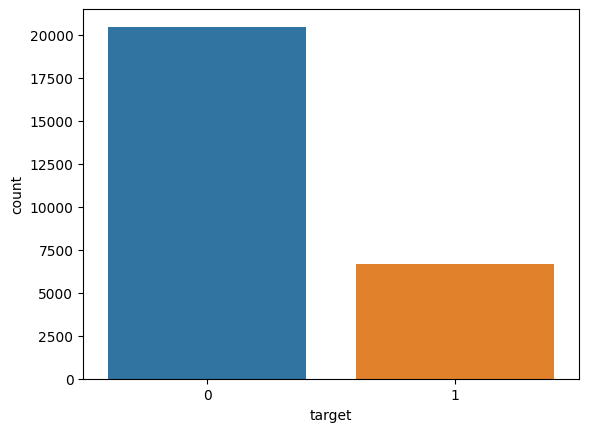

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure()
sns.countplot(x = "target", data = texts_classified)
plt.show()

##Submuestreo

In [ ]:
positivos_target = texts_classified[texts_classified['target'] == 0].sample(10000)
negativos_target = texts_classified[texts_classified['target'] == 1].sample(6654)


In [ ]:
datos_balanceados = pd.concat([positivos_target,negativos_target], ignore_index=True)
datos_balanceados

,id,content,target
0,1618145295019442177,When there's no new Sangxian fic &amp; and you...,0
1,1624054377769062400,"One thing that i like from Chat GPT, you can a...",0
2,1636057218733813760,AI is overrated. I asked chat GPT to pick my w...,0
3,1628154974764142592,WTF is going on here? Is she using chat GPT no...,0
4,1623718335358664706,@EzerRatchaga #ChatGPT is sick . Writing Essay...,0
...,...,...,...
16649,1621618813086179333,I asked #ChatGPT “What is #BusinessAnthropolog...,1
16650,1639155066992033792,.@Shopify announces a new @OpenAI/@Shop plug-i...,1
16651,1640115738668310528,@prfctnonsense Ouch not the b zone😭 but tbh sa...,1
16652,1640770053527457792,@maeiz @ayeejuju Chat gpt is crazy 😭,1


###PLN (Procesamiento de lenguaje natural), limpieza de texto

Bajamos la colección de signos de puntuación y stopwords para hacer el preprocesamiento. Las stopwords (palabras vacías) son palabras sin significado como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos en lenguaje natural.

In [ ]:
from nltk import download

download('stopwords')
download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Función para preprocesar el texto, limpiarlo y quitar *stopwords*.

Esta función usa expresiones regulares, las cuales son muy útiles en el tratamiento de texto. Más información: https://regex101.com/



In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

def preprocesar_textos(docs,ignore_list:list=[]):
    strings_list = [re.sub(r'\n', '', x.lower()) for x in docs]
    strings_list = [re.sub(r'[^\w\s]', '', x.lower()) for x in docs]  # quita signos de puntuación
    strings_list = [re.sub('[0-9]', '', x.lower()) for x in strings_list] # quita números
    SW = stopwords.words('english')
    for x in ignore_list: # quitamos stopwords
        SW.remove(x)
    tokens_no_sw = [" ".join([word for word in word_tokenize(text) if not word in SW]) for
                         text in strings_list ]
    return tokens_no_sw

In [ ]:
preprocesar_textos(datos_balanceados['content'])
datos_balanceados['content']

0        When there's no new Sangxian fic &amp; and you...
1        One thing that i like from Chat GPT, you can a...
2        AI is overrated. I asked chat GPT to pick my w...
3        WTF is going on here? Is she using chat GPT no...
4        @EzerRatchaga #ChatGPT is sick . Writing Essay...
                               ...                        
16649    I asked #ChatGPT “What is #BusinessAnthropolog...
16650    .@Shopify announces a new @OpenAI/@Shop plug-i...
16651    @prfctnonsense Ouch not the b zone😭 but tbh sa...
16652                 @maeiz @ayeejuju Chat gpt is crazy 😭
16653    ChatGPT was out for years (nope) months (nope)...
Name: content, Length: 16654, dtype: object

In [ ]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))

    return df

In [ ]:
clean_text(datos_balanceados, 'content')
datos_balanceados.head()

,id,content,target
0,1618145295019442177,when theres no new sangxian fic amp and youre ...,0
1,1624054377769062400,one thing that i like from chat gpt you can as...,0
2,1636057218733813760,ai is overrated i asked chat gpt to pick my wi...,0
3,1628154974764142592,wtf is going on here is she using chat gpt now...,0
4,1623718335358664706,chatgpt is sick writing essays on tsla,0


###Visualización de palabras

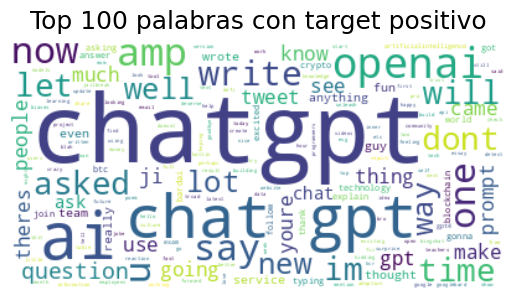

In [ ]:
from wordcloud import WordCloud
from functools import reduce

#Visualizar palabras que tienen significado con una nube de palabras

positive_df = datos_balanceados[datos_balanceados['target'] == 0]['content'][:100]             # 0 = positive, 1= negative

positive_df = reduce(lambda a, b: a+b, positive_df)

# Create and generate a word cloud image

cloud_positives = WordCloud(background_color='white').generate(positive_df)



# Display the generated wordcloud image

plt.imshow(cloud_positives, interpolation='bilinear')

plt.title('Top 100 palabras con target positivo', y = 1.02, size = 18)       # Choose title, position and size

plt.axis("off")                                                # Turn off axis labels
plt.show()

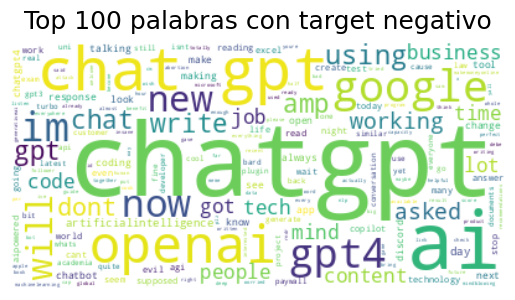

In [ ]:
#Visualizar palabras que tienen significado con una nube de palabras

negative_df = datos_balanceados[datos_balanceados['target'] == 1]['content'][:100]             # 0 = positive, 1= negative

negativetive_df = reduce(lambda a, b: a+b, negative_df)

# Create and generate a word cloud image

cloud_negatives = WordCloud(background_color='white').generate(negativetive_df)



# Display the generated wordcloud image

plt.imshow(cloud_negatives, interpolation='bilinear')

plt.title('Top 100 palabras con target negativo', y = 1.02, size = 18)       # Choose title, position and size

plt.axis("off")                                                # Turn off axis labels
plt.show()

### Modelo *Bag of Words* (BoW)

Usaremos el modelo BOW de conteos de ocurrencias de palabras que hemos usado para generar features de texto, usaremos el `CountVectorizer` de scikit-learn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

docs_list = datos_balanceados['content'].values

cv = CountVectorizer(max_features=800)
X_bow = cv.fit_transform(docs_list)
X_bow.shape
#(filas,features(palabras))

(16654, 800)

## PCA

Ahora, realizaremos PCA a la matriz de conteos.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(svd_solver='auto')

X_pca = pca.fit_transform(np.asarray(X_bow.todense()))

Observa la forma de la matriz obtenida.

In [ ]:
print(X_pca.shape)

(16654, 800)


Construimos un dataframe con la matriz de componentes principales y el *id* de cada documento.

In [ ]:
Xpca_df = pd.DataFrame(X_pca)
Xpca_df['id'] = datos_balanceados['id']

# Reordenamos las columnas, traemos la columna 'id' al principio
cols = Xpca_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
Xpca_df = Xpca_df[cols]

print(Xpca_df.shape)
Xpca_df.head()

(16654, 801)


,id,0,1,2,3,4,5,6,7,8,...,790,791,792,793,794,795,796,797,798,799
0,1618145295019442177,0.614920,0.802621,1.227815,0.476120,0.116274,-0.342377,0.149363,-0.913566,-0.486371,...,0.008850,0.009916,-0.025389,-0.042614,-0.018384,0.031627,-0.006043,0.005365,-0.049555,0.006574
1,1624054377769062400,0.634804,1.927699,-1.617337,1.877662,-1.394376,0.229801,2.307178,-1.343875,0.440933,...,-0.092870,0.030955,0.006234,-0.011391,0.006176,-0.010234,0.016491,-0.033281,-0.018678,-0.002498
2,1636057218733813760,0.014826,1.300590,-0.752135,1.214020,-0.321689,-0.773328,-0.861707,0.762130,-0.479753,...,0.005469,0.011020,-0.012226,0.002372,0.002925,-0.004498,0.000893,-0.007348,0.006658,0.005772
3,1628154974764142592,-0.670523,1.120188,-0.228507,0.170478,1.476671,-0.886758,-0.545684,-0.378522,-0.043556,...,-0.010356,0.002288,0.011362,0.000213,-0.007500,0.005671,-0.003546,0.006069,0.003605,-0.005772
4,1623718335358664706,-0.856032,-0.753346,0.078749,0.231538,0.667138,-0.063214,-0.328496,-0.317302,-0.064207,...,0.003291,0.005738,-0.001689,0.002613,-0.000967,-0.001445,-0.001575,0.001183,0.001793,-0.001790


Veamos la proporción de varianza por cada componente principal.

In [ ]:
pca_vr = pca.explained_variance_ratio_
print(pca_vr[:10])

[0.08469114 0.0462172  0.03898837 0.02731642 0.02342603 0.02147579
 0.02031005 0.01794481 0.01769497 0.01610224]


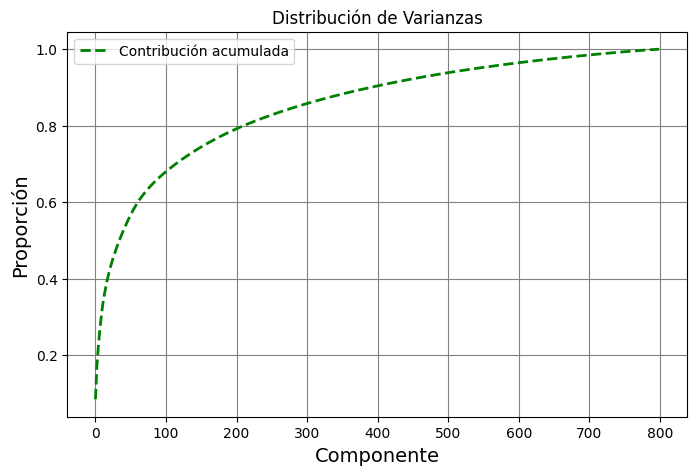

In [ ]:
D = pca_vr

"""Varianza acumulada"""
d = np.cumsum(D)

"""Areas de Graficacion y visualizacion de los datos"""
fig,ax = plt.subplots(figsize=(8,5))

pasos=range(len(D))
datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
ax.plot(datos[:,0],datos[:,1],
        ls='--',
        color='green',
        linewidth=2,
        label='Contribución acumulada')
plt.title('Distribución de Varianzas')
plt.xlabel('Componente',fontsize=14)
plt.ylabel('Proporción',fontsize=14)
plt.grid(True)
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='grey', linestyle='--')
ax.legend()
plt.show()

##Crear el conjunto de entrenamiento y prueba
Separamos los datos en datos de entrenamiento (80%) y prueba (20%)

In [ ]:
X = Xpca_df.iloc[:,1:].values
X

array([[ 6.14920335e-01,  8.02620941e-01,  1.22781462e+00, ...,
         5.36503327e-03, -4.95552953e-02,  6.57434696e-03],
       [ 6.34804317e-01,  1.92769922e+00, -1.61733652e+00, ...,
        -3.32813253e-02, -1.86783678e-02, -2.49795970e-03],
       [ 1.48263122e-02,  1.30059043e+00, -7.52135000e-01, ...,
        -7.34815387e-03,  6.65839977e-03,  5.77184865e-03],
       ...,
       [-8.76405120e-01,  9.53418706e-01,  9.26663744e-01, ...,
        -5.15716257e-03,  6.76727479e-03,  3.44345139e-03],
       [-1.41841984e+00,  8.17097158e-01,  3.60559820e-01, ...,
         1.70522869e-03, -6.92412756e-03, -3.30291632e-04],
       [-6.00165445e-01, -6.52076030e-01, -2.39238172e-02, ...,
        -6.46191433e-03,  5.46782913e-03, -6.60679676e-03]])

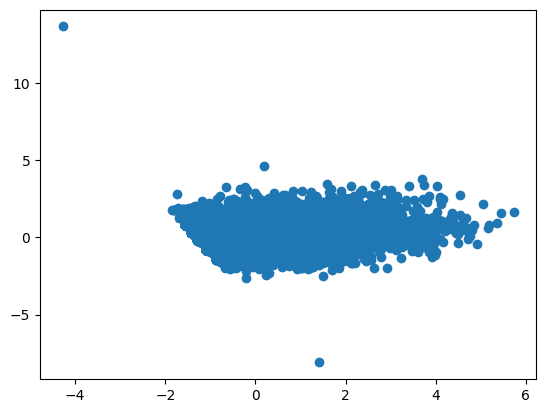

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

Separamos el conjunto completo en 80% de entrenamiento y 20% prueba.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, datos_balanceados['target'],
                                                    test_size=0.20,
                                                    random_state=0,
                                                    stratify=datos_balanceados['target']
                                                    )

print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  13323
X_test:  3331
y_train:  13323
y_test:  3331


Selección del modelo, con métricas accuracy, recall y F1-score.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.pipeline import Pipeline

selector = SelectKBest()
scaler = MinMaxScaler()


lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

nb = MultinomialNB()

params_lr = {
            "selector__k": [6,8,10],
            "clasificador__C": [10,15,20],
            "clasificador__solver": ['lbfgs','newton-cg','sag'],
            "clasificador__penalty": ['l2']}
params_dt = {
            "selector__k": [6,8,10],
            "clasificador__criterion": ['gini','entropy','log_loss'],
            "clasificador__max_depth": [30,40,50],
            "clasificador__min_samples_split": [3,4,6]}
params_rf = {
            "selector__k": [6,8,10],
            "clasificador__n_estimators": [75,100],
            "clasificador__max_depth": [30,40,50]
            }

params_nb = {
            "selector__k": [6,8,10]
            }

params_svm = {
            "selector__k": [6,8,10],
            "clasificador__C": [0.8,1],
            "clasificador__kernel": ['rbf']
            }

clasificadores = [lr,dt,rf,nb,svm]
params_grids = [params_lr,params_dt,params_rf,params_nb,params_svm]

training_cv_accs = []
testing_accs = []
testing_recall=[]
testing_f1=[]

b=[]

for j,(clf,param_grid) in enumerate(zip(clasificadores,params_grids)):
    pl = Pipeline([('selector',selector),
                ('escalador',scaler),
                ('clasificador',clf)])
    search = GridSearchCV(pl, param_grid, n_jobs=-1)
    search.fit(X_train, y_train)
    best_option = search.best_estimator_

    b.append(best_option)

    cvs = cross_val_score(best_option,X_train,y_train)

    training_cv_accs.append(np.mean(cvs))

    y_pred = best_option.predict(X_test)

    testing_accs.append(accuracy_score(y_test,y_pred))
    testing_recall.append(recall_score(y_test,y_pred))
    testing_f1.append(f1_score(y_test,y_pred))


    print(f"Clasificador {j+1} explorado")

Clasificador 1 explorado
Clasificador 2 explorado
Clasificador 3 explorado
Clasificador 4 explorado


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Clasificador 5 explorado


Veamos los resultados, ordenados por el accuracy de prueba.

In [ ]:
results_df = pd.DataFrame(data={
                        'clasificador':['LogReg','DT','RF','MultinomialNB','SVM'],
                        'Training accuracy': training_cv_accs,
                        'Test Accuracy':testing_accs,
                        'Test Recall':testing_recall,
                        'Test F1 score':testing_f1
                        })
results_df.sort_values(by='Test Accuracy',ascending=False)

,clasificador,Training accuracy,Test Accuracy,Test Recall,Test F1 score
2,RF,0.620056,0.619033,0.268219,0.360061
4,SVM,0.617279,0.613630,0.099925,0.171281
0,LogReg,0.614501,0.609427,0.133734,0.214846
3,MultinomialNB,0.600465,0.600420,0.000000,0.000000
1,DT,0.563686,0.576103,0.371901,0.412157


In [ ]:
b

[Pipeline(steps=[('selector', SelectKBest()), ('escalador', MinMaxScaler()),
                 ('clasificador', LogisticRegression(C=15))]),
 Pipeline(steps=[('selector', SelectKBest(k=8)), ('escalador', MinMaxScaler()),
                 ('clasificador',
                  DecisionTreeClassifier(criterion='log_loss', max_depth=30,
                                         min_samples_split=3))]),
 Pipeline(steps=[('selector', SelectKBest()), ('escalador', MinMaxScaler()),
                 ('clasificador', RandomForestClassifier(max_depth=50))]),
 Pipeline(steps=[('selector', SelectKBest(k=6)), ('escalador', MinMaxScaler()),
                 ('clasificador', MultinomialNB())]),
 Pipeline(steps=[('selector', SelectKBest()), ('escalador', MinMaxScaler()),
                 ('clasificador', SVC(C=0.8))])]

Mejor clasificador

**Pipeline(steps=[('selector', SelectKBest()), ('escalador', MinMaxScaler()),
                 ('clasificador', RandomForestClassifier(max_depth=30))])**


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier

selector = SelectKBest()
clf =  RandomForestClassifier(max_depth=30)


plf = Pipeline([('selector',selector),
               ('scaler',MinMaxScaler()),
               ('clasificador',clf)])

plf.fit(X_train,y_train)


Pipeline(steps=[('selector', SelectKBest()), ('scaler', MinMaxScaler()),
                ('clasificador', RandomForestClassifier(max_depth=30))])

## Predicciones

Veamos las predicciones

In [ ]:
y_predf = plf.predict(X_test)


In [ ]:
print(f"Valores de prueba:\n{y_train[:5]}")
print(f"Valores predichos:\n{np.round(y_predf[:5],2)}")

Valores de prueba:
3488     0
15192    1
12325    1
15298    1
11407    1
Name: target, dtype: int64
Valores predichos:
[0 0 1 0 1]


In [ ]:
y_predf

array([0, 0, 1, ..., 1, 0, 0])

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.

In [ ]:
print(f"Training mean accuracy: {round(plf.score(X_train, y_train),6)}")
print(f"Test mean accuracy: {round(plf.score(X_test, y_test),6)}")

Training mean accuracy: 0.982211
Test mean accuracy: 0.619634


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_predf),7)}")
print(f"Recall: {recall_score(y_test, y_predf)}")
print(f"Precision: {precision_score(y_test, y_predf)}")
print(f"f1 score: {f1_score(y_test, y_predf)}")


Accuracy: 0.6196337
Recall: 0.26145755071374904
Precision: 0.5506329113924051
f1 score: 0.35455934793683136


Observemos la matriz de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_predf)
print(CM)

[[1716  284]
 [ 983  348]]


Training mean accuracy: 0.982211
Accuracy: 0.6196337
Recall: 0.26145755071374904
Precision: 0.5506329113924051
f1 score: 0.35455934793683136


<Figure size 10x10 with 0 Axes>

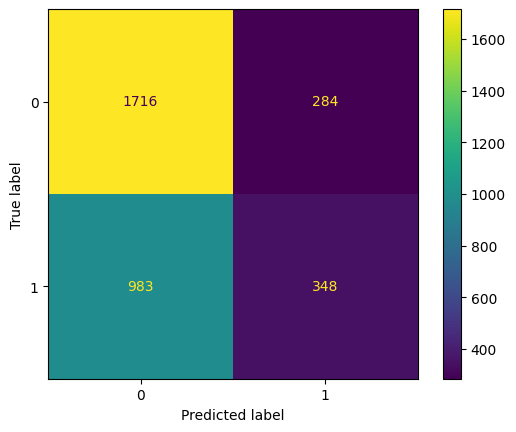

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"Training mean accuracy: {round(plf.score(X_train, y_train),6)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_predf),7)}")
print(f"Recall: {recall_score(y_test, y_predf)}")
print(f"Precision: {precision_score(y_test, y_predf)}")
print(f"f1 score: {f1_score(y_test, y_predf)}")


plt.figure(figsize=(.1,.1))
#sns.heatmap(cm,cmap='plasma',annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = ['0', '1' ])
cm_display.plot()
plt.show()

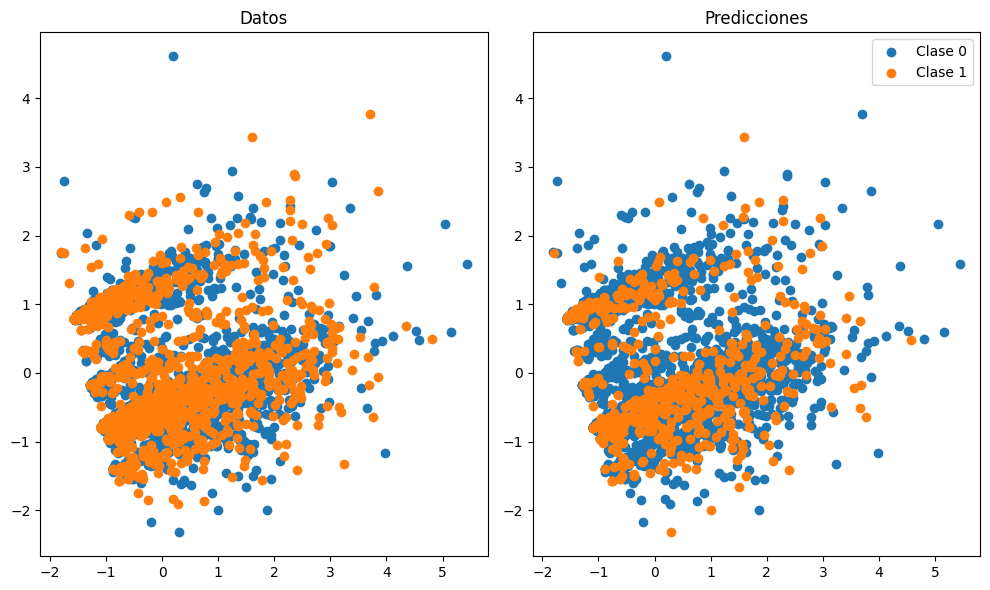

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

axs[0].title.set_text("Datos")
axs[0].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='Clase 0')
axs[0].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='Clase 1')

axs[1].title.set_text("Predicciones")
axs[1].scatter(X_test[y_predf==0, 0], X_test[y_predf==0, 1], label='Clase 0')
axs[1].scatter(X_test[y_predf==1, 0], X_test[y_predf==1, 1], label='Clase 1')

#-----Formato de la gráfica------------------------
fig.tight_layout()
plt.legend()
fig.show()





Veamos el score ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_probs = plf.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_probs[:,1])
from sklearn.metrics import roc_auc_score
print(f"ROC-AUC score: {score}")

ROC-AUC score: 0.6079474079639369


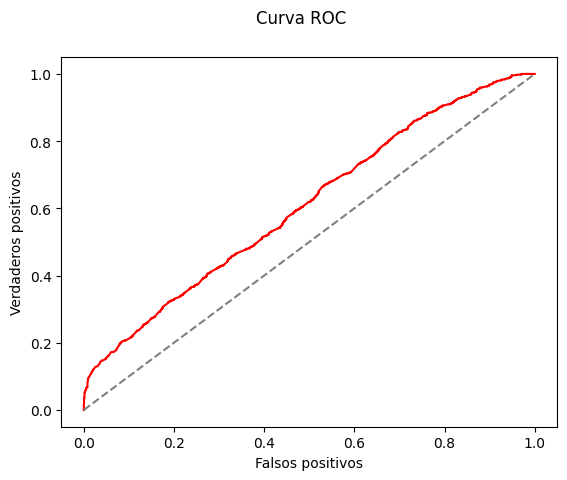

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])

plt.figure()
plt.suptitle("Curva ROC")
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.show()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_auc

0.5

###Implementemos el clasificador en los datos no clasificados.

In [ ]:
texts_no_classified = df1[~(df1['positivos'] )]['content']
clean_data = texts_no_classified.str.lower()
clean_data = clean_data.apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
clean_data = clean_data.apply(lambda elem: re.sub(r"\d+", "", elem))
clean_data

0         free ai marketing and automation tools strateg...
2           chat with any pdfcheck out how this new ai q...
3         ai muses in the court of life we must all face...
4         most people havent heard of chat gpt yetfirst ...
5          no chat gpt has been putting together amazing...
                                ...                        
500029     great thread thanks logan ive used chat gpt  ...
500030    its not what you sayor writeits how you say it...
500031     lamda versus  chatgpt  who cares lamda isnt a...
500032    chatgpt so much censorshipnever trust a system...
500035    i used chat gpt to get gym workout program and...
Name: content, Length: 478902, dtype: object

### Modelo *Bag of Words* (BoW)

Usaremos el modelo BOW de conteos de ocurrencias de palabras que hemos usado para generar features de texto, al igual que antes, usaremos el `CountVectorizer` de scikit-learn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

docs_list = clean_data[:800].values

cv = CountVectorizer(max_features=800)
X_bow = cv.fit_transform(docs_list)
X_bow.shape
#(filas,features(palabras))

(800, 800)

## PCA

Ahora, realizaremos PCA a la matriz de conteos.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(svd_solver='auto')

X_pca = pca.fit_transform(np.asarray(X_bow.todense()))

Observa la forma de la matriz obtenida.

In [ ]:
print(X_pca.shape)

(800, 800)


Construimos un dataframe con la matriz de componentes principales y el *id* de cada documento.

In [ ]:
Xpca_df = pd.DataFrame(X_pca)
Xpca_df['id'] = datos_balanceados['id']

# Reordenamos las columnas, traemos la columna 'id' al principio
cols = Xpca_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
Xpca_df = Xpca_df[cols]

print(Xpca_df.shape)
Xpca_df.head()

(800, 801)


,id,0,1,2,3,4,5,6,7,8,...,790,791,792,793,794,795,796,797,798,799
0,1618145295019442177,-0.629323,-1.023969,0.089430,-0.971728,0.964998,0.543315,-0.701494,-0.464866,-0.439304,...,1.824268e-19,8.186124e-18,-5.832216e-18,5.235622e-18,-2.241375e-18,2.619114e-18,-1.363853e-18,-1.580899e-18,-5.105552e-19,6.182923e-18
1,1624054377769062400,-0.838976,-0.721245,0.231174,-0.572313,0.690933,0.738056,-0.179493,0.165155,-0.341217,...,1.824268e-19,8.186124e-18,-5.832216e-18,5.235622e-18,-2.241375e-18,2.619114e-18,-1.363853e-18,-1.580899e-18,-5.105552e-19,6.182923e-18
2,1636057218733813760,2.419175,-1.329360,-1.731724,-0.815143,-0.240148,-0.495753,0.975693,0.202815,0.307530,...,1.824268e-19,8.186124e-18,-5.832216e-18,5.235622e-18,-2.241375e-18,2.619114e-18,-1.363853e-18,-1.580899e-18,-5.105552e-19,6.182923e-18
3,1628154974764142592,1.526877,0.820621,-0.634316,-1.685573,0.097263,1.250200,-0.050114,-0.063793,-0.840815,...,1.196043e-16,4.176028e-17,2.176045e-17,7.042761e-17,1.440627e-17,1.277016e-16,-7.109100e-17,-8.524532e-17,-5.630661e-18,-9.835070e-16
4,1623718335358664706,-1.671674,0.610278,-0.701409,-0.130089,-0.220384,-0.085234,-0.068395,-0.062142,-0.127451,...,1.824268e-19,8.186124e-18,-5.832216e-18,5.235622e-18,-2.241375e-18,2.619114e-18,-1.363853e-18,-1.580899e-18,-5.105552e-19,6.182923e-18


In [ ]:
X1 = Xpca_df.iloc[:,1:].values
X1

array([[-6.29323214e-01, -1.02396899e+00,  8.94304482e-02, ...,
        -1.58089873e-18, -5.10555241e-19,  6.18292323e-18],
       [-8.38975663e-01, -7.21244523e-01,  2.31173616e-01, ...,
        -1.58089873e-18, -5.10555241e-19,  6.18292323e-18],
       [ 2.41917483e+00, -1.32935953e+00, -1.73172369e+00, ...,
        -1.58089873e-18, -5.10555241e-19,  6.18292323e-18],
       ...,
       [-1.68231141e+00,  6.20397769e-01, -6.73306546e-01, ...,
         1.59296295e-16,  1.65658027e-17, -4.35457676e-16],
       [-8.76320432e-02, -7.35808475e-01, -5.61308152e-01, ...,
        -1.58089873e-18, -5.10555241e-19,  6.18292323e-18],
       [-7.82272521e-01, -6.05938870e-01,  9.49227937e-01, ...,
        -1.58089873e-18, -5.10555241e-19,  6.18292323e-18]])

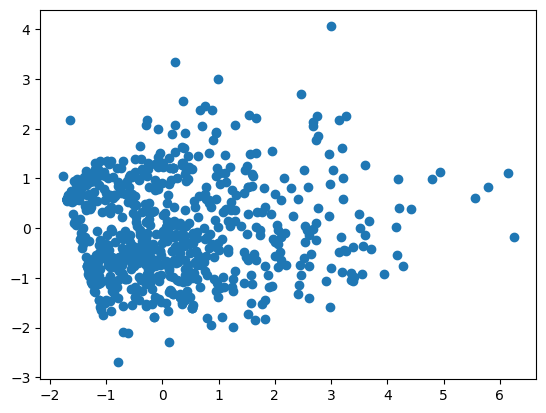

In [ ]:
plt.figure()
plt.scatter(X1[:,0],X1[:,1])
plt.show()

In [ ]:
predic = plf.predict(X1)

In [ ]:
vfinal=pd.DataFrame(predic)


In [ ]:
vfinal.value_counts()

0    634
1    166
dtype: int64

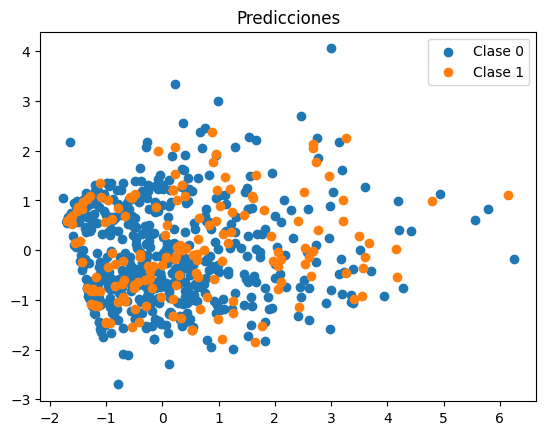

In [ ]:

plt.figure()

plt.title("Predicciones")
plt.scatter(X1[predic==0, 0], X1[predic==0, 1], label='Clase 0')
plt.scatter(X1[predic==1, 0], X1[predic==1, 1], label='Clase 1')

#-----Formato de la gráfica------------------------

plt.legend()
plt.show()